<a href="https://colab.research.google.com/github/juancbotero/aplicaciones_finanzas/blob/main/Equally_Weighted_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf
from matplotlib.figure import Figure
import plotly.graph_objects as go
from scipy.optimize import minimize

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
# Next we will get the stock tickers and the price data.

#tick = ['ICLN', 'GLD', 'IVV', 'SCZ', 'EFA', 'LQD', 'HYG','VNQ']

ticker = ['JPM', 'AAPL', 'WMT', 'TGT', 'MSFT', 'AMZN', 'META','JNJ', 'PG', 'DIS']
price_data = yf.download(ticker,
                         start='2014-01-01',
                         end='2023-05-31')['Adj Close']

#price_data.columns = tick

ticker_SP500 = '^GSPC'

SP500_data = yf.download(ticker_SP500,
                         start='01-01-2014',
                         end='05-31-2023')['Adj Close']

SP500_data.columns = ticker_SP500

print(price_data.head())
print()
#print(SP500_data.head())
print()
print(price_data.tail())
print()

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^GSPC']: ValueError("time data '05-31-2023' does not match format '%Y-%m-%d'")


Ticker           AAPL       AMZN        DIS        JNJ        JPM       META  \
Date                                                                           
2014-01-02  17.318731  19.898500  69.964485  69.339211  44.047375  54.709999   
2014-01-03  16.938305  19.822001  69.817726  69.963814  44.387886  54.560001   
2014-01-06  17.030676  19.681499  69.551689  70.329430  44.645157  57.200001   
2014-01-07  16.908880  19.901501  70.028702  71.822426  44.130615  57.919998   
2014-01-08  17.015955  20.096001  69.001297  71.723381  44.546787  58.230000   

Ticker           MSFT         PG        TGT        WMT  
Date                                                    
2014-01-02  31.290810  60.028870  47.543846  63.778645  
2014-01-03  31.080307  59.961781  47.777126  63.568516  
2014-01-06  30.423512  60.103397  47.453541  63.212902  
2014-01-07  30.659273  60.684734  47.340656  63.406864  
2014-01-08  30.111944  59.805283  47.175114  62.905769  


Ticker            AAPL        AMZN    

In [ ]:
returns_data = price_data.pct_change(1)

returns_data.dropna(inplace=True)

returns_SP500 = SP500_data.pct_change(1)

returns_SP500.dropna(inplace=True)

print(returns_data.head())
print()
print(returns_SP500.head())

Ticker          AAPL      AMZN       DIS       JNJ       JPM      META  \
Date                                                                     
2014-01-03 -0.021966 -0.003845 -0.002098  0.009008  0.007731 -0.002742   
2014-01-06  0.005453 -0.007088 -0.003810  0.005226  0.005796  0.048387   
2014-01-07 -0.007152  0.011178  0.006858  0.021229 -0.011525  0.012587   
2014-01-08  0.006332  0.009773 -0.014671 -0.001379  0.009430  0.005352   
2014-01-09 -0.012770 -0.002264 -0.004254  0.006054 -0.001868 -0.017345   

Ticker          MSFT        PG       TGT       WMT  
Date                                                
2014-01-03 -0.006727 -0.001118  0.004907 -0.003295  
2014-01-06 -0.021132  0.002362 -0.006773 -0.005594  
2014-01-07  0.007749  0.009672 -0.002379  0.003068  
2014-01-08 -0.017852 -0.014492 -0.003497 -0.007903  
2014-01-09 -0.006432  0.002243  0.010369  0.003341  

Series([], Name: Adj Close, dtype: float64)


In [ ]:
Assets_Returns = (np.mean(returns_data)*252)
print('Annual Asset Returns')
print(Assets_Returns)

print()

Assets_Std = (np.std(returns_data)*np.sqrt(252))
print('Annual Standard Deviations')
print(Assets_Std)

print()



Annual Asset Returns
Ticker
AAPL    0.289221
AMZN    0.248322
DIS     0.061330
JNJ     0.099986
JPM     0.156719
META    0.239816
MSFT    0.288309
PG      0.107535
TGT     0.154330
WMT     0.109534
dtype: float64

Annual Standard Deviations
Ticker
AAPL    0.288869
AMZN    0.333537
DIS     0.273957
JNJ     0.180816
JPM     0.274864
META    0.378957
MSFT    0.273740
PG      0.184423
TGT     0.302045
WMT     0.210179
dtype: float64



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
risk_free_asset = 0.04

Sharpe_Ratios_Assets = (Assets_Returns - risk_free_asset) / Assets_Std

print('Sharpe Ratios')
print(Sharpe_Ratios_Assets)

print()

Sharpe_Ratio_SP500 = (np.mean(returns_SP500)*252 - risk_free_asset) / (np.std(returns_SP500)*np.sqrt(252))
print('S&P 500 Sharpe Ratio')
print(Sharpe_Ratio_SP500)

Sharpe Ratios
Ticker
AAPL    0.862746
AMZN    0.624584
DIS     0.077858
JNJ     0.331750
JPM     0.424643
META    0.527279
MSFT    0.907097
PG      0.366199
TGT     0.378519
WMT     0.330832
dtype: float64

S&P 500 Sharpe Ratio
nan


In [ ]:
# create price series
# Create a DataFrame with prices starting at 100 for each asset
Prices_Base100 = (1 + returns_data).cumprod() * 100
print(Prices_Base100.head())

print()

SP500_Base100 = (1 + returns_SP500).cumprod() * 100
print('S&P 500 Base 100')
print(SP500_Base100.head())

Ticker           AAPL        AMZN         DIS         JNJ         JPM  \
Date                                                                    
2014-01-03  97.803382   99.615549   99.790238  100.900794  100.773057   
2014-01-06  98.336741   98.909461   99.409992  101.428080  101.357135   
2014-01-07  97.633481  100.015078  100.091785  103.581257  100.188980   
2014-01-08  98.251741  100.992538   98.623318  103.438416  101.133808   
2014-01-09  96.997094  100.763879   98.203772  104.064597  100.944863   

Ticker            META       MSFT          PG         TGT        WMT  
Date                                                                  
2014-01-03   99.725831  99.327270   99.888239  100.490663  99.670534  
2014-01-06  104.551273  97.228266  100.124153   99.810059  99.112959  
2014-01-07  105.867299  97.981719  101.092582   99.572626  99.417077  
2014-01-08  106.433925  96.232551   99.627534   99.224437  98.631399  
2014-01-09  104.587831  95.613571   99.851006  100.253247  98.

## **En esta parte vamos a graficar los precios de los activos en base 100, así como el SP500, también en base 100.**

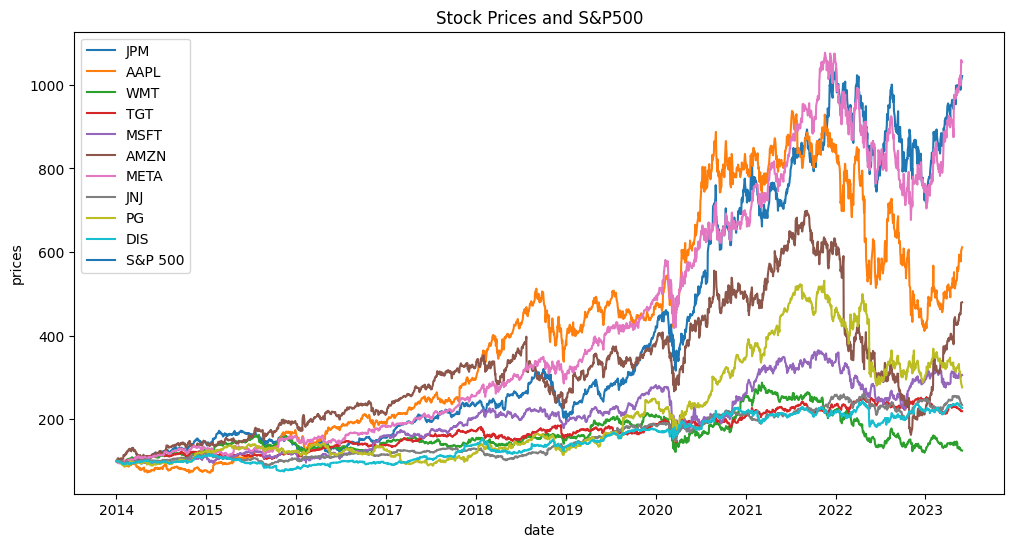

In [ ]:
# Increase the size of the graph
plt.figure(figsize=(12, 6))

# plotting the points
plt.plot(Prices_Base100, label=(ticker))
plt.plot(SP500_Base100, label='S&P 500')

# naming the x axis
plt.xlabel('date')
# naming the y axis
plt.ylabel('prices')

# giving a title to my graph
plt.title('Stock Prices and S&P500')

# Adding legends based on column names in the DataFrame
plt.legend()


# function to show the plot
plt.show()

## **Ahora Calcularemos tanto la Matriz de Correlaciones como la Matriz de Varianza-Covarianza**

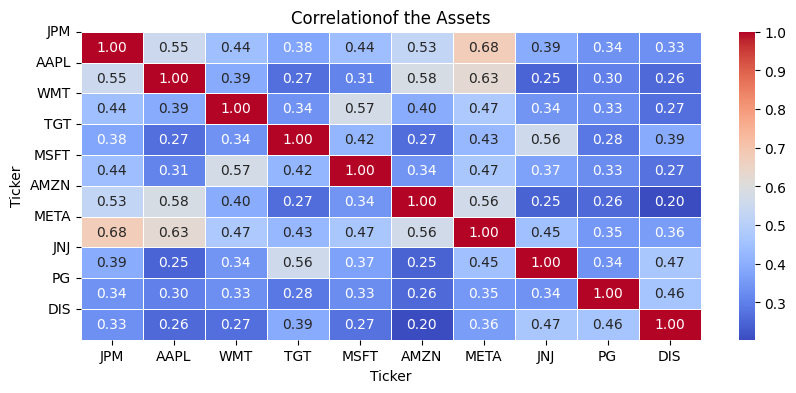


Matrix Variance-Covariance (Annual)
Ticker      AAPL      AMZN       DIS       JNJ       JPM      META      MSFT  \
Ticker                                                                         
AAPL    0.083481  0.053012  0.035173  0.019902  0.035188  0.057941  0.053478   
AMZN    0.053012  0.111294  0.035885  0.016042  0.028241  0.073436  0.057181   
DIS     0.035173  0.035885  0.075084  0.016774  0.043070  0.041147  0.035623   
JNJ     0.019902  0.016042  0.016774  0.032708  0.020937  0.018196  0.021167   
JPM     0.035188  0.028241  0.043070  0.020937  0.075582  0.035604  0.035337   
META    0.057941  0.073436  0.041147  0.018196  0.035604  0.143669  0.058634   
MSFT    0.053478  0.057181  0.035623  0.021167  0.035337  0.058634  0.074965   
PG      0.020988  0.015256  0.017225  0.018679  0.018726  0.017211  0.022655   
TGT     0.029490  0.030341  0.027201  0.015558  0.027137  0.029382  0.028682   
WMT     0.020124  0.018065  0.015442  0.014870  0.015796  0.016222  0.020748   

Ti

In [ ]:
Mat_Correlaciones = returns_data.corr()

import seaborn as sns

plt.figure(figsize=(10, 4))
sns.heatmap(Mat_Correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.xticks(
    ticks=np.arange(0.5, len(ticker), 1),
    labels=ticker,
    rotation=0,
    ha='center')

plt.yticks(range(len(ticker)), ticker, rotation=0)

plt.title('Correlationof the Assets')
plt.show()

print()
print('Matrix Variance-Covariance (Annual)')
Mat_Var_Covar = returns_data.cov()*252
print(Mat_Var_Covar)


## **Ahora vamos a calcular el retorno y varianza de un portafolio de pesos iguales (Equally Weighted)**

In [ ]:

num_assets = len(ticker)
W_equal = np.ones(num_assets) / num_assets
print(W_equal)

print()

print('Return of an Equally Weighted Portfolio')
Return_Equally_Weighted = np.dot(W_equal, Assets_Returns)
print(f"{Return_Equally_Weighted:.2%}")

print()

print('Variance of an Equally Weighted Portfolio')
Variance_Equally_Weighted = np.dot(np.dot(W_equal, Mat_Var_Covar), W_equal.T)
print(f"{Variance_Equally_Weighted:.2%}")

print()

print('Sharpe Ratio of an Equally Weighted Portfolio')
SR_Equally_Weighted = (Return_Equally_Weighted - risk_free_asset) / np.sqrt(Variance_Equally_Weighted)
print(f"{SR_Equally_Weighted:.2}")

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Return of an Equally Weighted Portfolio
17.55%

Variance of an Equally Weighted Portfolio
3.36%

Sharpe Ratio of an Equally Weighted Portfolio
0.74


**Ahora vamos a comparar el riesgo de cada activo individual con el de un portafolio que tiene el mismo peso en cada activo.**
---



In [ ]:
print('Standard Deviation of an Equally Weighted Portfolio')
Std_Dev__Equally_Weighted = np.sqrt(np.dot(np.dot(W_equal, Mat_Var_Covar), W_equal.T))
print(f"{Std_Dev__Equally_Weighted:.2%}")

print()

print('Annual Standard Deviations')
print(Assets_Std)


Standard Deviation of an Equally Weighted Portfolio
18.34%

Annual Standard Deviations
Ticker
AAPL    0.288869
AMZN    0.333537
DIS     0.273957
JNJ     0.180816
JPM     0.274864
META    0.378957
MSFT    0.273740
PG      0.184423
TGT     0.302045
WMT     0.210179
dtype: float64
